Tourism network that created using in Neo4j tool

In [1]:
!pip install networkx
!pip install torch
!pip install scipy>=1.8
#!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt #needed to visualize loss curves
import numpy as np 
import pandas as pd
import csv
from tqdm import tqdm

In [3]:
!pip install rdflib networkx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [4]:
from rdflib import Graph

g = Graph()
g.parse("yo.ttl", format="turtle")


<Graph identifier=N26609bf5ca3f4034a4d5622f198940c3 (<class 'rdflib.graph.Graph'>)>

In [5]:
import networkx as nx

G = nx.DiGraph()

for s, p, o in g:
    # Add nodes
    if s not in G:
        G.add_node(s)
    if o not in G:
        G.add_node(o)

    # Add edges
    G.add_edge(s, o, label=p)


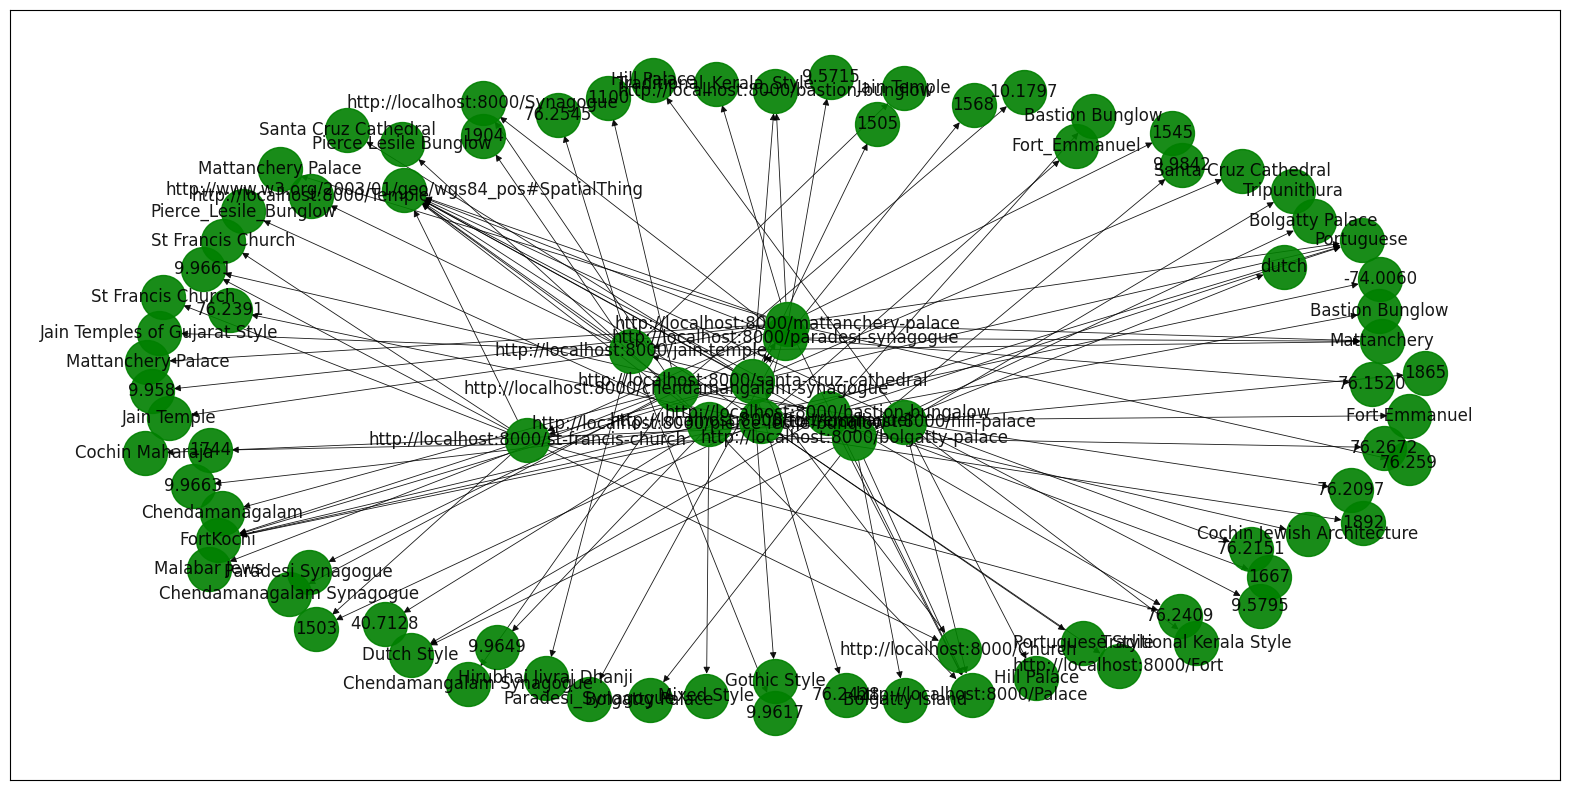

In [6]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
nx.draw_networkx(nx.relabel_nodes(G, nx.get_node_attributes(G, 'text')),with_labels=True, node_color='green',node_size = 1000, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Split the edges into training and test sets, with 20% of edges used for testing
edges_train, edges_test = train_test_split(list(G.edges()), test_size=0.2, random_state=42)

# Create separate subgraphs for training and testing, using only the edges in the corresponding set
G_train = G.edge_subgraph(edges_train)
G_test = G.edge_subgraph(edges_test)


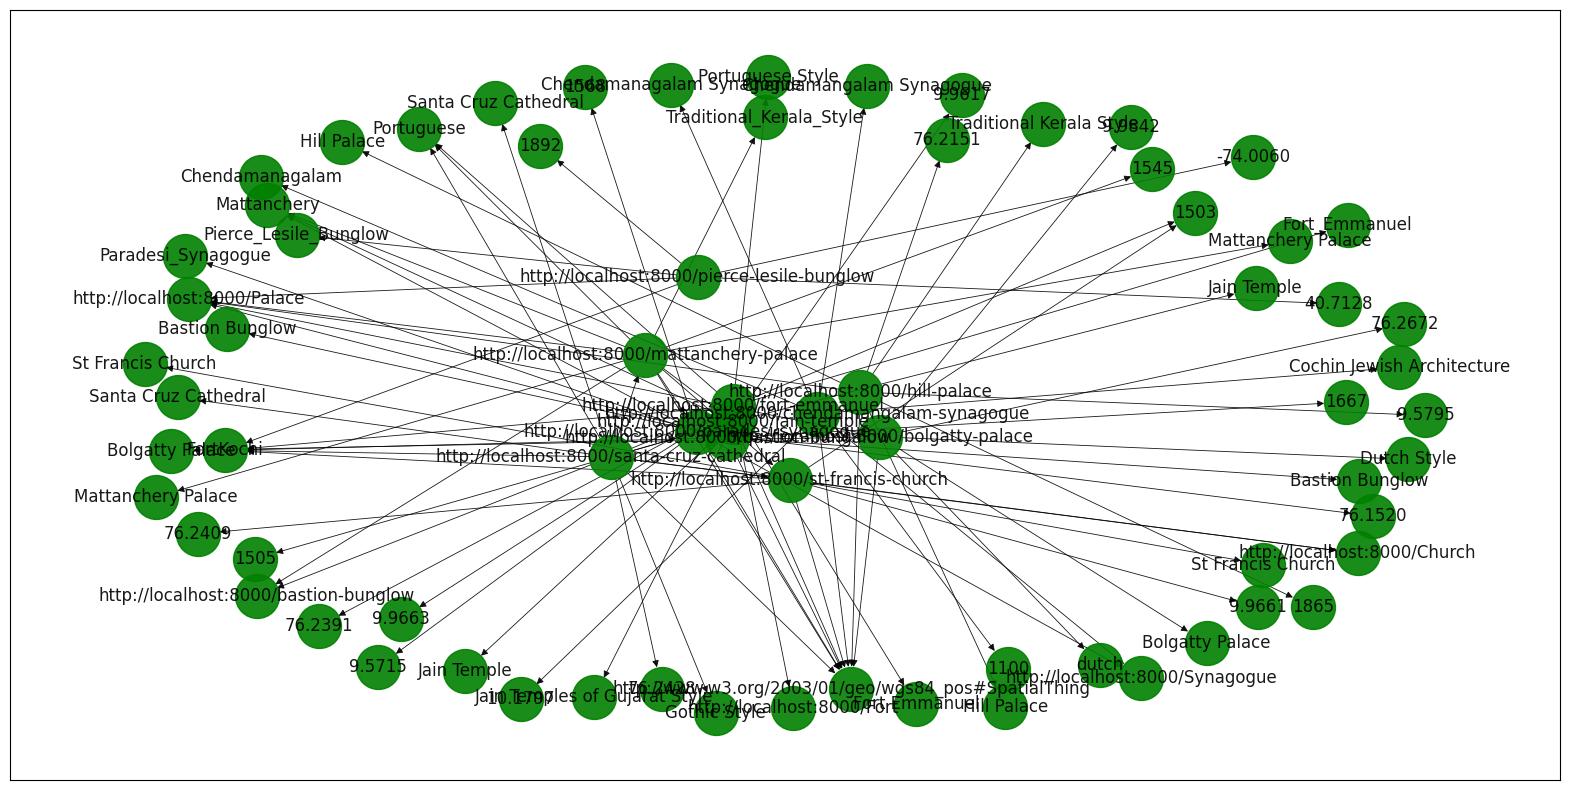

In [8]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G_train)
nx.draw_networkx(nx.relabel_nodes(G_train, nx.get_node_attributes(G_train, 'text')),with_labels=True, node_color='green',node_size = 1000, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

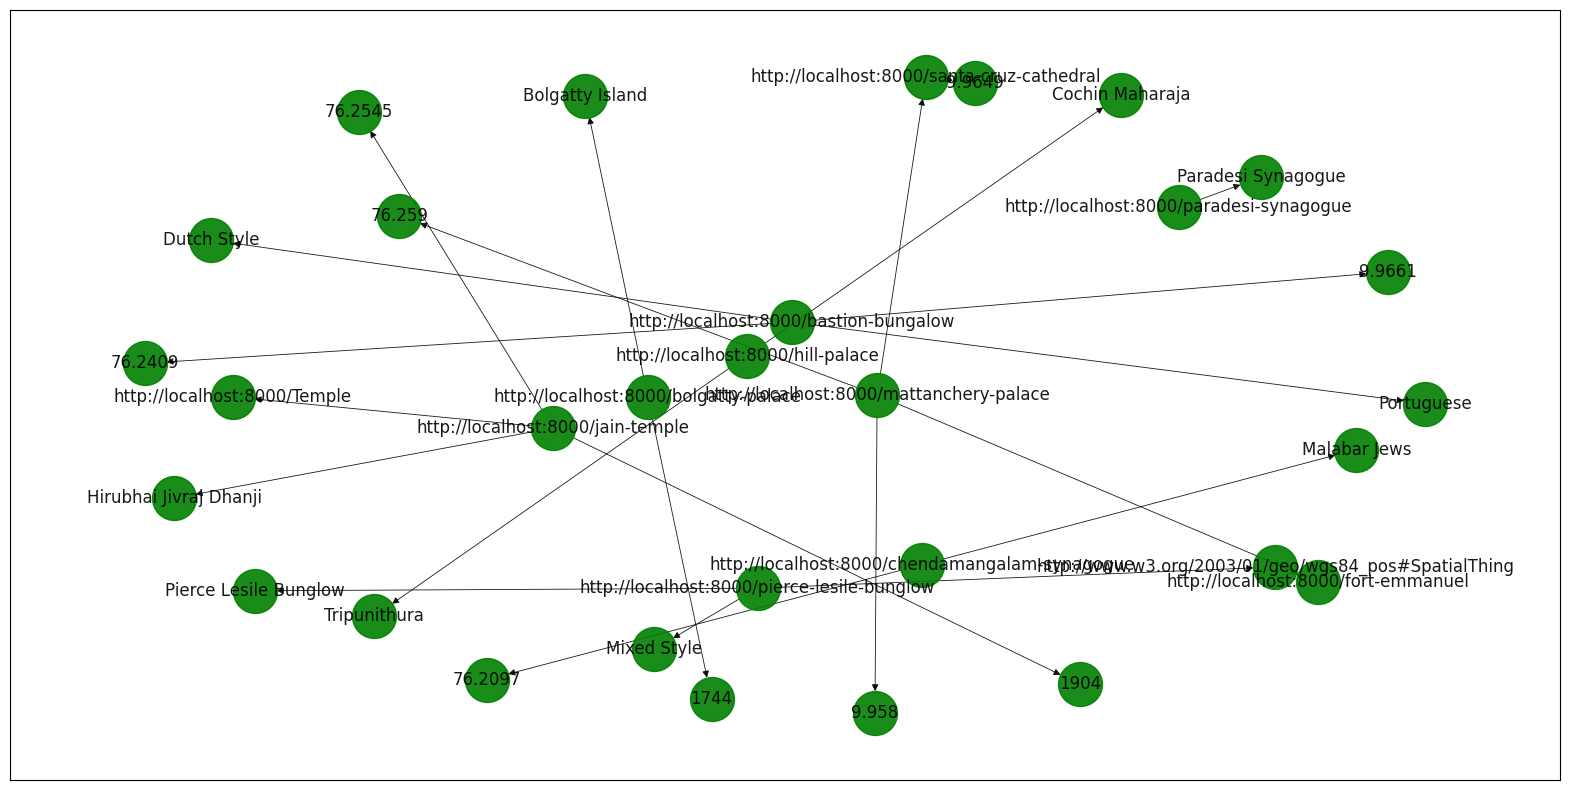

In [9]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G_test)
nx.draw_networkx(nx.relabel_nodes(G_test, nx.get_node_attributes(G_test, 'text')),with_labels=True, node_color='green',node_size = 1000, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

In [10]:
# Load the graph from a file
#G = nx.read_edgelist('wiki-vote.txt', create_using=nx.DiGraph())
#df = pd.DataFrame(features_list)

# Create a CSV file to write the features
with open('features.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['node1', 'node2','Ind1', 'Ind2', 'Od1', 'Od2','DC1','DC2','BC1','BC2','UN','SIM','is_edge'])
    
    # Create a dictionary to map URLs to node IDs
    url_to_node = {}
    node_id = 0
    
    for u in G_train.nodes():
        if u not in url_to_node:
            url_to_node[u] = node_id
            node_id += 1
        
    for u in G_train.nodes():
        for v in G_train.nodes():

            # Calculate the features
            if u != v:
                #jaccard_coeff = nx.jaccard_coefficient(G, [(node1, node2)])
                indegree1 = G_train.in_degree(u)
                indegree2 = G_train.in_degree(v)
                outdegree1 = G_train.out_degree(u)
                outdegree2 = G_train.out_degree(v)
                #common_neighbours = len(list(nx.common_neighbors(G, node1, node2)))
                degree_centrality = nx.degree_centrality(G_train)
                #eigenvector_centrality = nx.eigenvector_centrality(G)
                betweenness_centrality = nx.betweenness_centrality(G_train)   

                union_neighbours = len(set(G_train.neighbors(u)).union(G_train.neighbors(v)))
                similarity = nx.simrank_similarity(G_train, u, v)
                is_edge = G_train.has_edge(u, v)
                #path_length = nx.shortest_path_length(G, u, v)
                #katz_uv = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[u] + nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[v]
                # Node similarity feature
                #pa = nx.preferential_attachment(G, [(node1,node2)])
                #katz = nx.katz_similarity_numpy(G, alpha=alpha, max_iter=1000)[node1][node2]
                # Temporal features (assuming a temporal attribute 'time' is attached to each edge)
                #time_diff = abs(G[u][v]['time'])
                #freq_interactions = len(list(G.in_edges(node1))) + len(list(G.out_edges(node1))) + len(list(G.in_edges(node2))) + len(list(G.out_edges(node2)))
                #rate_change = (len(list(G.in_edges(node1))) + len(list(G.out_edges(node1)))) / (G.nodes[node1]['time'] - G.nodes[node2]['time'])
                
                # Replace the URLs with node IDs
                u_id = url_to_node[u]
                v_id = url_to_node[v]

                # Write the features to the CSV file
                writer.writerow([u_id, v_id, indegree1, indegree2, outdegree1, outdegree2,degree_centrality[u],degree_centrality[v], betweenness_centrality[u], betweenness_centrality[v], union_neighbours,similarity,is_edge])


In [11]:
# Load the graph from a file
#G = nx.read_edgelist('wiki-vote.txt', create_using=nx.DiGraph())
#df = pd.DataFrame(features_list)

# Create a CSV file to write the features
with open('featurestest.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['node1', 'node2','Ind1', 'Ind2', 'Od1', 'Od2','DC1','DC2','BC1','BC2','UN','SIM','is_edge'])
    
    # Create a dictionary to map URLs to node IDs
    url_to_node = {}
    node_id = 0
    
    for u in G_test.nodes():
        if u not in url_to_node:
            url_to_node[u] = node_id
            node_id += 1
        
    for u in G_test.nodes():
        for v in G_test.nodes():

            # Calculate the features
            if u != v:
                #jaccard_coeff = nx.jaccard_coefficient(G, [(node1, node2)])
                indegree1 = G_test.in_degree(u)
                indegree2 = G_test.in_degree(v)
                outdegree1 = G_test.out_degree(u)
                outdegree2 = G_test.out_degree(v)
                #common_neighbours = len(list(nx.common_neighbors(G, node1, node2)))
                degree_centrality = nx.degree_centrality(G_test)
                #eigenvector_centrality = nx.eigenvector_centrality(G)
                betweenness_centrality = nx.betweenness_centrality(G_test)   

                union_neighbours = len(set(G_test.neighbors(u)).union(G_test.neighbors(v)))
                similarity = nx.simrank_similarity(G_test, u, v)
                is_edge = G_test.has_edge(u, v)
                #path_length = nx.shortest_path_length(G, u, v)
                #katz_uv = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[u] + nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[v]
                # Node similarity feature
                #pa = nx.preferential_attachment(G, [(node1,node2)])
                #katz = nx.katz_similarity_numpy(G, alpha=alpha, max_iter=1000)[node1][node2]
                # Temporal features (assuming a temporal attribute 'time' is attached to each edge)
                #time_diff = abs(G[u][v]['time'])
                #freq_interactions = len(list(G.in_edges(node1))) + len(list(G.out_edges(node1))) + len(list(G.in_edges(node2))) + len(list(G.out_edges(node2)))
                #rate_change = (len(list(G.in_edges(node1))) + len(list(G.out_edges(node1)))) / (G.nodes[node1]['time'] - G.nodes[node2]['time'])
                
                # Replace the URLs with node IDs
                u_id = url_to_node[u]
                v_id = url_to_node[v]

                # Write the features to the CSV file
                writer.writerow([u_id, v_id, indegree1, indegree2, outdegree1, outdegree2,degree_centrality[u],degree_centrality[v], betweenness_centrality[u], betweenness_centrality[v], union_neighbours,similarity,is_edge])


In [12]:
import pandas as pd

# Load the feature matrix and target vector for the training graph
df_train = pd.read_csv('features.csv', index_col=0)

# Split the feature matrix and target vector
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

# Load the feature matrix and target vector for the test graph
df_test = pd.read_csv('featurestest.csv', index_col=0)

# Split the feature matrix and target vector
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values


In [13]:
print(X_train)

[[ 1.  0.  0. ...  0. 13.  0.]
 [ 2.  0.  1. ...  0.  8.  0.]
 [ 3.  0.  0. ...  0. 22.  0.]
 ...
 [68.  1.  1. ...  0.  0.  0.]
 [69.  1.  1. ...  0.  0.  0.]
 [70.  1.  1. ...  0.  0.  0.]]


In [14]:
print(y_train)

[False False False ... False False False]


In [15]:
print(X_test)

[[ 1.  0.  1. ...  0.  4.  0.]
 [ 2.  0.  0. ...  0.  5.  0.]
 [ 3.  0.  0. ...  0.  6.  0.]
 ...
 [27.  1.  1. ...  0.  0.  0.]
 [28.  1.  1. ...  0.  0.  0.]
 [29.  1.  1. ...  0.  0.  0.]]


In [16]:
print(y_test)

[ True False False False False  True False False False False False False
 False False False False  True False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False Fa

In [17]:
from sklearn.preprocessing import LabelBinarizer

# Convert the target vector to binary form
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [18]:
# Oversample Class 1 using the SMOTE algorithm
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [19]:
import tensorflow as tf


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]),
    tf.keras.layers.Dropout(0.2), # add dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data and save the training history
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, validation_data=(X_test, y_test))

# Print the training and validation accuracy for each epoch
print(history.history['accuracy'])
print(history.history['val_accuracy'])


Epoch 1/50
314/314 [==============================] - 3s 3ms/step - loss: 0.4200 - accuracy: 0.8278 - val_loss: 0.2511 - val_accuracy: 0.7925
Epoch 2/50
314/314 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9290 - val_loss: 0.2350 - val_accuracy: 0.8065
Epoch 3/50
314/314 [==============================] - 1s 3ms/step - loss: 0.2102 - accuracy: 0.9336 - val_loss: 0.2281 - val_accuracy: 0.8118
Epoch 4/50
314/314 [==============================] - 1s 4ms/step - loss: 0.2030 - accuracy: 0.9332 - val_loss: 0.2480 - val_accuracy: 0.8097
Epoch 5/50
314/314 [==============================] - 1s 4ms/step - loss: 0.1949 - accuracy: 0.9359 - val_loss: 0.2774 - val_accuracy: 0.8301
Epoch 6/50
314/314 [==============================] - 1s 4ms/step - loss: 0.1940 - accuracy: 0.9369 - val_loss: 0.2350 - val_accuracy: 0.8516
Epoch 7/50
314/314 [==============================] - 1s 3ms/step - loss: 0.1910 - accuracy: 0.9363 - val_loss: 0.2764 - val_accuracy: 0.8226
Epoch 

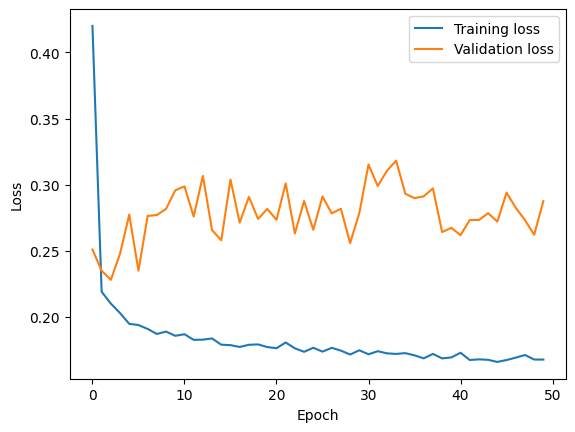

In [22]:
# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

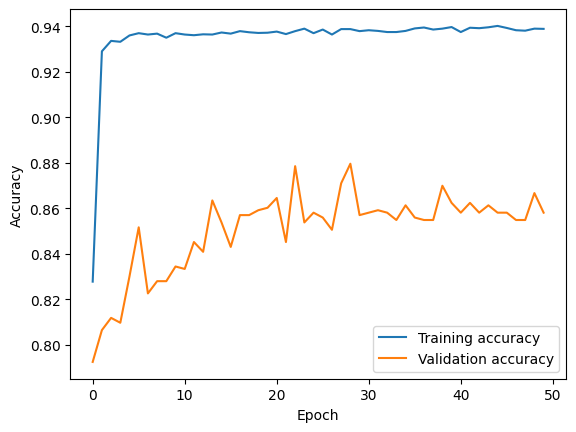

In [23]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [25]:
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

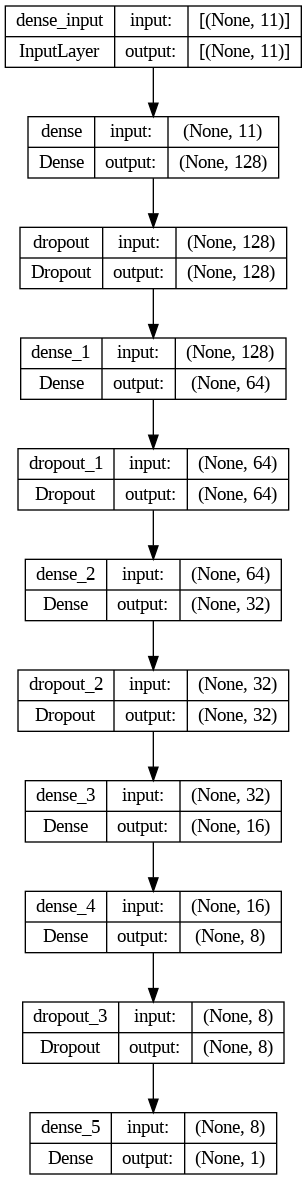

In [26]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
# Predict the edges using the trained model
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary form using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)


30/30 [==============================] - 0s 1ms/step


160/160 [==============================] - 0s 1ms/step


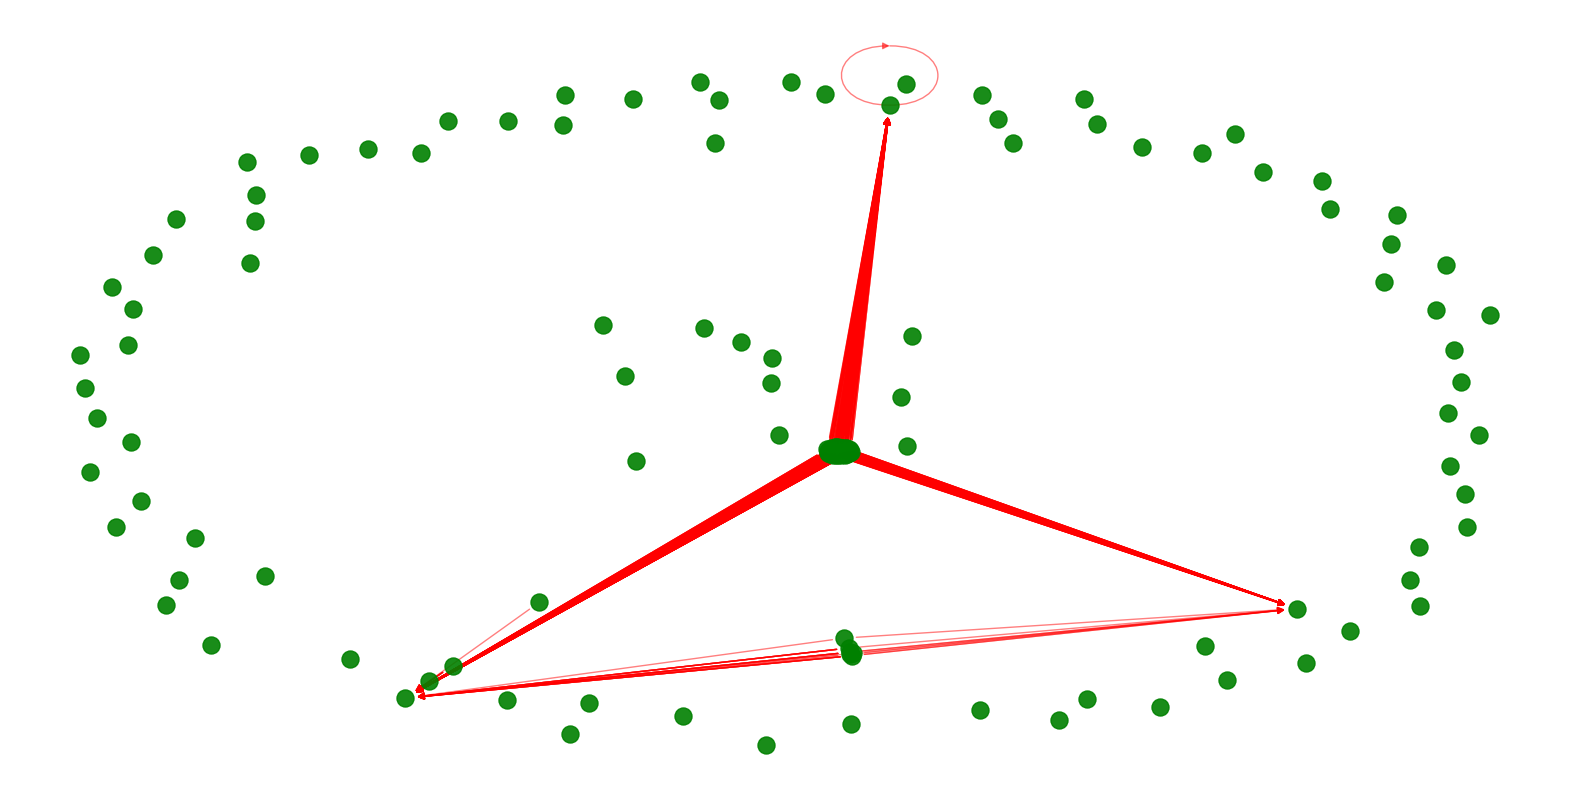

In [28]:
# Predict the edges using the trained model
pred = model.predict(X_train)

# Create a list of predicted edges
pred_edges = [(u, v) for (u, v), p in zip(df_train.iloc[:, :2].values, pred) if p > 0.5]

# Add the predicted edges to the graph
G.add_edges_from(pred_edges)

# Draw the graph with predicted links in a different color
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
#nx.draw(G,with_labels=True)
nx.draw_networkx_nodes(G, pos=posn, node_color='green', node_size=150, alpha=0.9)
nx.draw_networkx_edges(G, pos=posn, edge_color='red', alpha=0.5, edgelist=pred_edges)
nx.draw_networkx_labels(G, pos=posn, labels=nx.get_node_attributes(G, 'text'), font_size=10,clip_on=True)
plt.axis('off')
plt.show()


In [29]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


30/30 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.99      0.86      0.92       906
     Class 1       0.14      0.83      0.23        24

    accuracy                           0.86       930
   macro avg       0.57      0.85      0.58       930
weighted avg       0.97      0.86      0.90       930



30/30 [==============================] - 0s 1ms/step


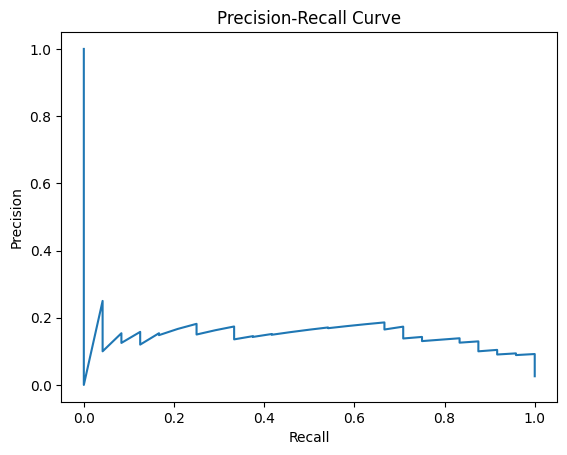

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict the probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix

# Get the predicted classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)


30/30 [==============================] - 0s 1ms/step
[[778 128]
 [  4  20]]


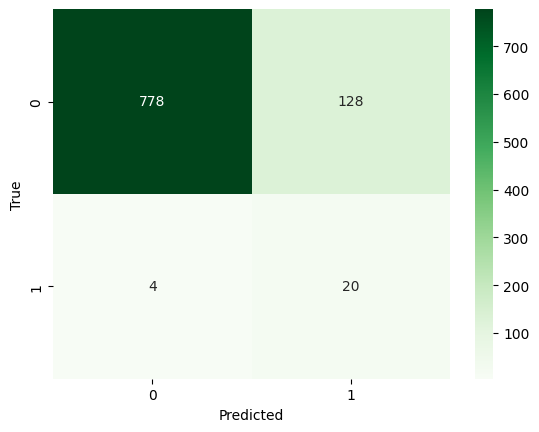

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [39]:
y_pred = model.predict(X_train_resampled)


314/314 [==============================] - 2s 6ms/step


In [40]:
def compute_hits(y_true, y_pred, k):
    hits = 0
    for i in range(len(y_true)):
        if y_true[i] in y_pred[i, :k]:
            hits += 1
    return hits / len(y_true)

hits_10 = compute_hits(y_test, y_pred, 10)
hits_100 = compute_hits(y_test, y_pred, 100)
hits_500 = compute_hits(y_test, y_pred, 500)


In [41]:
def compute_mrr(y_true, y_pred):
    mrr = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            mrr += 1 / (rank[0] + 1)
    return mrr / len(y_true)

mrr = compute_mrr(y_test, y_pred)


In [42]:
def compute_amri(y_true, y_pred):
    amri = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            amri += np.exp(-rank[0])
    return amri / len(y_true)

amri = compute_amri(y_test, y_pred)


In [43]:
print('Hits @10:', hits_10)
print('Hits @100:', hits_100)
print('Hits @500:', hits_500)
print('MRR:', mrr)
print('AMRI:', amri)


Hits @10: 0.09462365591397849
Hits @100: 0.09462365591397849
Hits @500: 0.09462365591397849
MRR: 0.09462365591397849
AMRI: 0.09462365591397849
